logistic regression

LOGISTIC REGRESSIONS DEFAULT PREDICTION

In [52]:
#INSTALLING LIBRARY
#load data
import pandas as pd
import numpy as py
import numpy as np

#visualization

!pip install seaborn matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


#modelling
import statsmodels.formula.api as smf
from scipy.special import expit, logit

In [2]:
#connecting file in drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

In [13]:
#read data
default_data = pd.read_csv('/content/drive/MyDrive/default.csv')

In [14]:
default_data

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [15]:
#get data info
default_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


balance VS default status Visualization

<ipython-input-16-cfb1e1f9de51>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'balance', y = 'default', data = default_data, palette = "viridis", order = ["Yes", "No"])


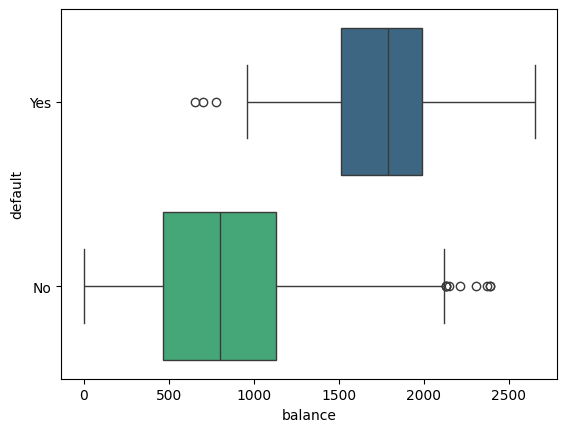

In [16]:
sns.boxplot(x = 'balance', y = 'default', data = default_data, palette = "viridis", order = ["Yes", "No"])
plt.show()

income vs default visualization

<ipython-input-17-2714b3fc8525>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'income', y = 'default', data = default_data, palette = "viridis", order = ["Yes", "No"])


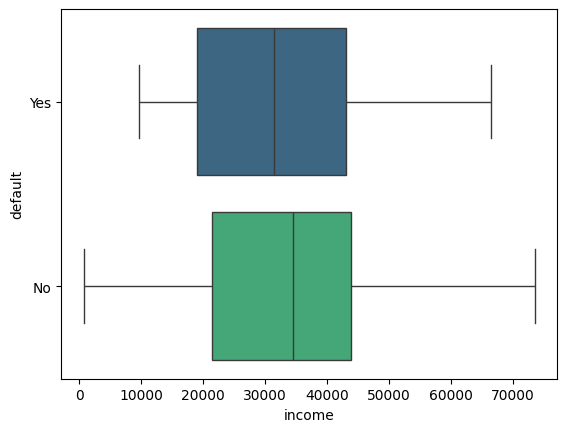

In [17]:
sns.boxplot(x = 'income', y = 'default', data = default_data, palette = "viridis", order = ["Yes", "No"])
plt.show()

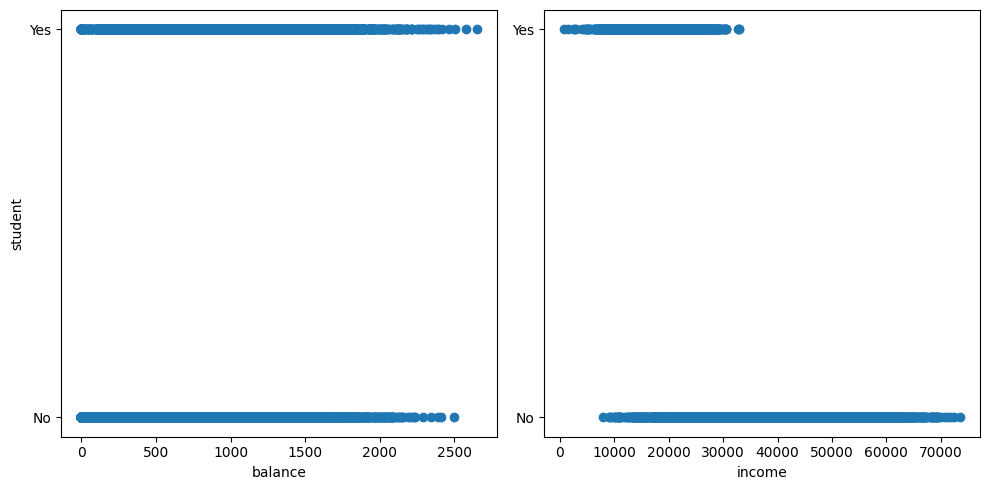

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].scatter(x = 'balance', y = 'student', data = default_data)
axes[0].set_xlabel('balance')
axes[0].set_ylabel('student')
axes[1].scatter(x = 'income', y = 'student', data = default_data)
axes[1].set_xlabel('income')
plt.tight_layout()

In [20]:
#change default and student into number
default_data['default'] = default_data['default'].map({'Yes': 1, 'No':0})
default_data['student'] = default_data['student'].map({'Yes': 1, 'No':0})

In [53]:
default_data

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


# **Build the model**

In [48]:
#creating logit model object
logit_model = smf.logit("default ~ student + balance + income", default_data)
#fitting model
logit_model = logit_model.fit()
result = print_coef_std_err(logit_model)
result

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,coef,std err
Intercept,-10.869045,0.492273
student,-0.646776,0.236257
balance,0.005737,0.000232
income,0.000003,0.000008


In [29]:
def estimate_probability(st, bl, inc):
  x = result['coef'][0] + result['coef'][1]*st + result['coef'][2]*bl + result['coef'][3]*inc
  prob_default =  expit(x)
  prob_notdefault = 1- prob_default
  print(f"Probability of default {(prob_default*100):.2f}% probability of NOT default {(prob_notdefault*100):.2f}%")

#testing the function
estimate_probability(st = 1, bl = 1700, inc = 50000)

Probability of default 16.63% probability of NOT default 83.37%


<ipython-input-29-bd65ee08ca2f>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = result['coef'][0] + result['coef'][1]*st + result['coef'][2]*bl + result['coef'][3]*inc


# **Data Visualization**

<ipython-input-30-005784d2767f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_value = result['coef'][0]  + result['coef'][1]*st + result['coef'][2]*bal +  result['coef'][3]*inc


Text(0, 0.5, 'default probability')

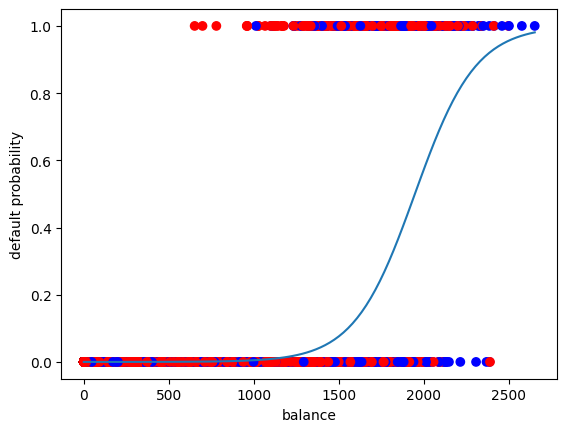

In [30]:
#data viz balance vs default_probability
plt.scatter(default_data['balance'], default_data['default'], color = default_data['student'].map({1: 'blue', 0: 'red'}))
bal = np.linspace(min(default_data['balance']), max(default_data['balance']), 100)
inc = np.linspace(min(default_data['income']), max(default_data['income']), 100)
st = np.linspace(min(default_data['student']), max(default_data['student']), 100)
y_value = result['coef'][0]  + result['coef'][1]*st + result['coef'][2]*bal +  result['coef'][3]*inc
pred_prob = expit(y_value)
plt.plot(bal, pred_prob)
plt.xlabel("balance")
plt.ylabel("default probability")

<ipython-input-31-79af4d4bc91a>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_value = result['coef'][0]  + result['coef'][1]*st + result['coef'][2]*bal +  result['coef'][3]*inc


Text(0, 0.5, 'default probability')

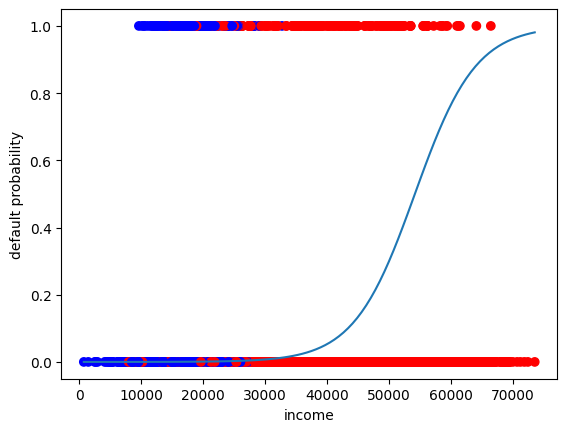

In [31]:
#data viz income vs default_probability
plt.scatter(default_data['income'], default_data['default'], color = default_data['student'].map({1: "blue", 0 : "red"}))
bal = np.linspace(min(default_data['balance']), max(default_data['balance']), 100)
inc = np.linspace(min(default_data['income']), max(default_data['income']), 100)
st = np.linspace(min(default_data['student']), max(default_data['student']), 100)
y_value = result['coef'][0]  + result['coef'][1]*st + result['coef'][2]*bal +  result['coef'][3]*inc
pred_prob = expit(y_value)
plt.plot(inc, pred_prob)
plt.xlabel("income")
plt.ylabel("default probability")

<ipython-input-32-d1e1e8f34c53>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_value = result['coef'][0]  + result['coef'][1]*st + result['coef'][2]*bal +  result['coef'][3]*inc


Text(0, 0.5, 'default probability')

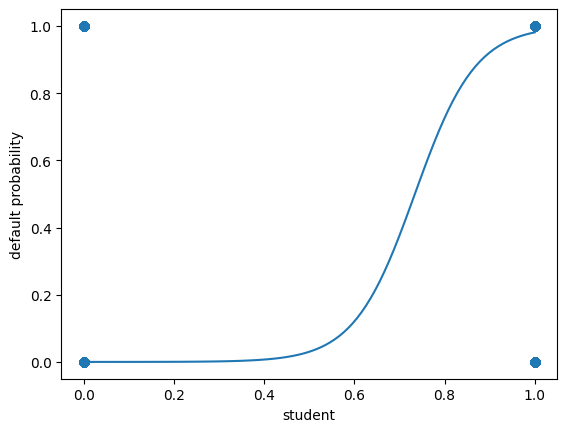

In [32]:
#data viz student vs default_probability
plt.scatter(default_data['student'], default_data['default'])
bal = np.linspace(min(default_data['balance']), max(default_data['balance']), 100)
inc = np.linspace(min(default_data['income']), max(default_data['income']), 100)
st = np.linspace(min(default_data['student']), max(default_data['student']), 100)
y_value = result['coef'][0]  + result['coef'][1]*st + result['coef'][2]*bal +  result['coef'][3]*inc
pred_prob = expit(y_value)
plt.plot(st, pred_prob)
plt.xlabel("student")
plt.ylabel("default probability")

# **K Fold cross validation**

In [72]:
#creating logit model object
logit_model = smf.logit("default ~ student + balance + income", default_data)
#fitting model
logit_model = logit_model.fit()
result = print_coef_std_err(logit_model)
result

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,coef,std err
Intercept,-10.869045,0.492273
student,-0.646776,0.236257
balance,0.005737,0.000232
income,0.000003,0.000008


In [95]:
from sklearn.model_selection import KFold

#number of folds
kf = KFold(n_splits=7, shuffle = True, random_state = 42)

#create list to store validation result, (will count the mean from each item)
accuracy_score = []

#perform K-Fold cross validation
for train_index, test_index in kf.split(default_data):
  #split data into training and testing
  train_data = default_data.iloc[train_index]
  test_data =  default_data.iloc[test_index]

  # Train the logistic regression model on the training set
  logit_model = smf.logit("default ~ student + balance + income", data=train_data)
  result = logit_model.fit(disp=0)

  predictions = result.predict(test_data) # -- > result obtained when creating the model

  predicted_classes = (predictions >= 0.5).astype(int)

  #calculate accuracy for the fold
  accuracy = np.mean(predicted_classes == test_data['default'])
  accuracy_score.append(accuracy)

print(f"mean R2 score : {np.mean(accuracy_score):.4f}")


mean R2 score : 0.9732
